In [341]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Imports

In [342]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from itertools import product
import random
from typing import List
from tqdm import tqdm

from reader import parse_csvs, SimulationResults

# Clean CSV Data Files

In [343]:
from io import TextIOWrapper
import os

for file in [file for file in os.listdir("data") if file.startswith("Attempt")]:
    file_path: str = f"data/{file}"
    f: TextIOWrapper = open(file_path, "r")
    lines: list[str] = f.readlines()
    if lines[0].strip().endswith(";"):
        print(f"Fixing file {file_path}")
        lines[0] = lines[0].strip()[:-1] + "\n"
    f.close()

    f = open(file_path, "w")
    f.writelines(lines)
    f.close()

# Get Data

In [344]:
simulation_results: List[SimulationResults] = parse_csvs()

Started parsing...


  2%|▏         | 16/641 [00:00<00:04, 154.21it/s]

Excluding extinct result 109 - 09.05.2024 05-31-28
Excluding extinct result 116 - 09.05.2024 06-04-15
Excluding extinct result 123 - 09.05.2024 06-34-18


  5%|▍         | 32/641 [00:00<00:04, 146.33it/s]

Excluding extinct result 134 - 09.05.2024 07-23-55


 10%|█         | 65/641 [00:00<00:03, 153.79it/s]

Excluding extinct result 135 - 09.05.2024 07-26-55
Excluding extinct result 137 - 09.05.2024 07-34-52
Excluding extinct result 142 - 09.05.2024 07-53-57
Excluding extinct result 145 - 09.05.2024 08-05-58
Excluding extinct result 154 - 09.05.2024 08-44-20
Excluding extinct result 155 - 09.05.2024 08-44-46
Excluding extinct result 162 - 09.05.2024 09-14-56
Excluding extinct result 164 - 09.05.2024 09-20-27


 16%|█▌        | 101/641 [00:00<00:03, 159.35it/s]

Excluding extinct result 168 - 09.05.2024 09-37-14
Excluding extinct result 180 - 09.05.2024 10-29-14
Excluding extinct result 181 - 09.05.2024 10-30-57
Error parsing file Initial settings 182 - 09.05.2024 10-33-28.csv: [Errno 2] No such file or directory: 'c:\\Users\\PC\\Desktop\\studia\\Metody Systemowe i Decyzyjne\\Projekt\\MSiDProject\\data\\Attempt 182 - 09.05.2024 10-33-28.csv'


 21%|██        | 133/641 [00:00<00:03, 134.08it/s]

Excluding extinct result 202 - 15.05.2024 09-07-07
Excluding extinct result 208 - 15.05.2024 09-31-02
Excluding extinct result 209 - 15.05.2024 09-35-07
Excluding extinct result 219 - 15.05.2024 10-20-23
Excluding extinct result 22 - 09.05.2024 11-22-58


 25%|██▌       | 163/641 [00:01<00:03, 141.22it/s]

Excluding extinct result 231 - 15.05.2024 11-14-51
Excluding extinct result 24 - 09.05.2024 11-30-19
Excluding extinct result 241 - 15.05.2024 11-58-57


 31%|███       | 196/641 [00:01<00:02, 148.68it/s]

Excluding extinct result 260 - 15.05.2024 01-26-44
Excluding extinct result 263 - 15.05.2024 01-39-48
Excluding extinct result 268 - 15.05.2024 02-02-14
Excluding extinct result 269 - 15.05.2024 02-03-08
Excluding extinct result 27 - 09.05.2024 11-41-48
Excluding extinct result 277 - 15.05.2024 02-40-34
Error parsing file Initial settings 280 - 15.05.2024 02-54-20.csv: Cannot convert non-finite values (NA or inf) to integer
Excluding extinct result 282 - 15.05.2024 03-01-10


 36%|███▌      | 230/641 [00:01<00:02, 151.19it/s]

Excluding extinct result 293 - 15.05.2024 03-48-25
Excluding extinct result 311 - 15.05.2024 05-09-05
Excluding extinct result 312 - 15.05.2024 05-09-54


 41%|████      | 262/641 [00:01<00:02, 149.01it/s]

Excluding extinct result 317 - 15.05.2024 05-30-38
Excluding extinct result 322 - 15.05.2024 05-50-29
Excluding extinct result 323 - 15.05.2024 05-52-10


 46%|████▌     | 296/641 [00:01<00:02, 154.47it/s]

Excluding extinct result 347 - 05.06.2024 03-16-35
Excluding extinct result 348 - 05.06.2024 03-17-12
Excluding extinct result 352 - 05.06.2024 03-35-01
Excluding extinct result 360 - 05.06.2024 04-09-19
Excluding extinct result 361 - 05.06.2024 04-13-27


 51%|█████     | 328/641 [00:02<00:02, 153.64it/s]

Excluding extinct result 376 - 05.06.2024 05-21-22
Excluding extinct result 392 - 05.06.2024 06-32-01
Excluding extinct result 394 - 05.06.2024 06-37-27
Excluding extinct result 398 - 05.06.2024 06-54-02
Excluding extinct result 400 - 05.06.2024 07-00-39
Excluding extinct result 401 - 05.06.2024 07-01-16


 56%|█████▌    | 360/641 [00:02<00:01, 151.74it/s]

Excluding extinct result 407 - 05.06.2024 07-26-28
Excluding extinct result 410 - 05.06.2024 07-36-20
Excluding extinct result 411 - 05.06.2024 07-38-50
Excluding extinct result 414 - 05.06.2024 07-49-43
Excluding extinct result 42 - 09.05.2024 12-48-56
Excluding extinct result 426 - 05.06.2024 08-44-58
Excluding extinct result 428 - 05.06.2024 08-54-07
Excluding extinct result 43 - 09.05.2024 12-51-53
Excluding extinct result 431 - 05.06.2024 09-05-24
Excluding extinct result 437 - 05.06.2024 09-30-08


 64%|██████▍   | 413/641 [00:02<00:01, 165.88it/s]

Excluding extinct result 440 - 05.06.2024 09-40-20
Excluding extinct result 46 - 09.05.2024 01-05-26
Excluding extinct result 460 - 05.06.2024 11-10-05
Excluding extinct result 463 - 05.06.2024 11-20-59
Error parsing file Initial settings 464 - 05.06.2024 11-21-24.csv: [Errno 2] No such file or directory: 'c:\\Users\\PC\\Desktop\\studia\\Metody Systemowe i Decyzyjne\\Projekt\\MSiDProject\\data\\Attempt 464 - 05.06.2024 11-21-24.csv'
Excluding extinct result 47 - 09.05.2024 01-05-50


 70%|██████▉   | 448/641 [00:02<00:01, 164.23it/s]

Excluding extinct result 482 - 06.06.2024 10-45-45
Excluding extinct result 487 - 06.06.2024 11-05-59
Excluding extinct result 493 - 06.06.2024 11-33-17
Excluding extinct result 497 - 06.06.2024 11-51-23
Excluding extinct result 500 - 06.06.2024 12-02-57
Excluding extinct result 502 - 06.06.2024 12-10-13
Excluding extinct result 506 - 06.06.2024 12-24-33
Excluding extinct result 514 - 06.06.2024 01-00-57


 78%|███████▊  | 498/641 [00:03<00:00, 158.52it/s]

Excluding extinct result 524 - 06.06.2024 01-45-09
Excluding extinct result 53 - 09.05.2024 01-31-01
Excluding extinct result 532 - 06.06.2024 02-18-45
Excluding extinct result 545 - 06.06.2024 03-15-28


 83%|████████▎ | 531/641 [00:03<00:00, 153.93it/s]

Excluding extinct result 552 - 06.06.2024 03-44-59
Excluding extinct result 555 - 06.06.2024 03-56-34
Excluding extinct result 562 - 06.06.2024 04-29-15
Excluding extinct result 564 - 06.06.2024 04-36-39
Excluding extinct result 576 - 06.06.2024 05-31-01


 88%|████████▊ | 562/641 [00:03<00:00, 144.99it/s]

Excluding extinct result 586 - 06.06.2024 06-13-40
Excluding extinct result 601 - 06.06.2024 07-20-02
Excluding extinct result 609 - 06.06.2024 07-54-18
Excluding extinct result 61 - 09.05.2024 02-05-34


 95%|█████████▌| 611/641 [00:04<00:00, 149.66it/s]

Excluding extinct result 626 - 06.06.2024 09-09-48
Excluding extinct result 63 - 09.05.2024 02-10-27
Excluding extinct result 639 - 06.06.2024 10-09-38
Excluding extinct result 74 - 09.05.2024 02-59-58
Excluding extinct result 75 - 09.05.2024 03-02-35
Excluding extinct result 8 - 09.05.2024 10-20-09


100%|██████████| 641/641 [00:04<00:00, 151.98it/s]

Excluding extinct result 88 - 09.05.2024 03-59-43
Excluding extinct result 90 - 09.05.2024 04-06-25
Excluding extinct result 92 - 09.05.2024 04-15-24
Ended parsing. Parsed files: 546, errors: 3, skipped: 92


# Creating DataFrames

In [345]:
initial_parameters = DataFrame([result.parameters.iloc[0] for result in simulation_results])
results = DataFrame([result.get_last_history() for result in simulation_results])

# Introductory analysis

In [346]:
def correlation_matrix(df: pd.DataFrame) -> None:
    """
    Generate a correlation matrix heatmap for a given DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame for which the correlation matrix is to be generated.

    Returns:
    - None
    """
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
    plt.show()
    
def correlation_column(df: pd.DataFrame, column: str) -> None:
    """
    Generates a heatmap showing the correlation between the specified column and all other columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to calculate the correlation with.

    Returns:
    None
    """
    plt.figure(figsize=(12,8))
    corr: DataFrame = df.corr()[[column]].drop(column)
    sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
    plt.show()

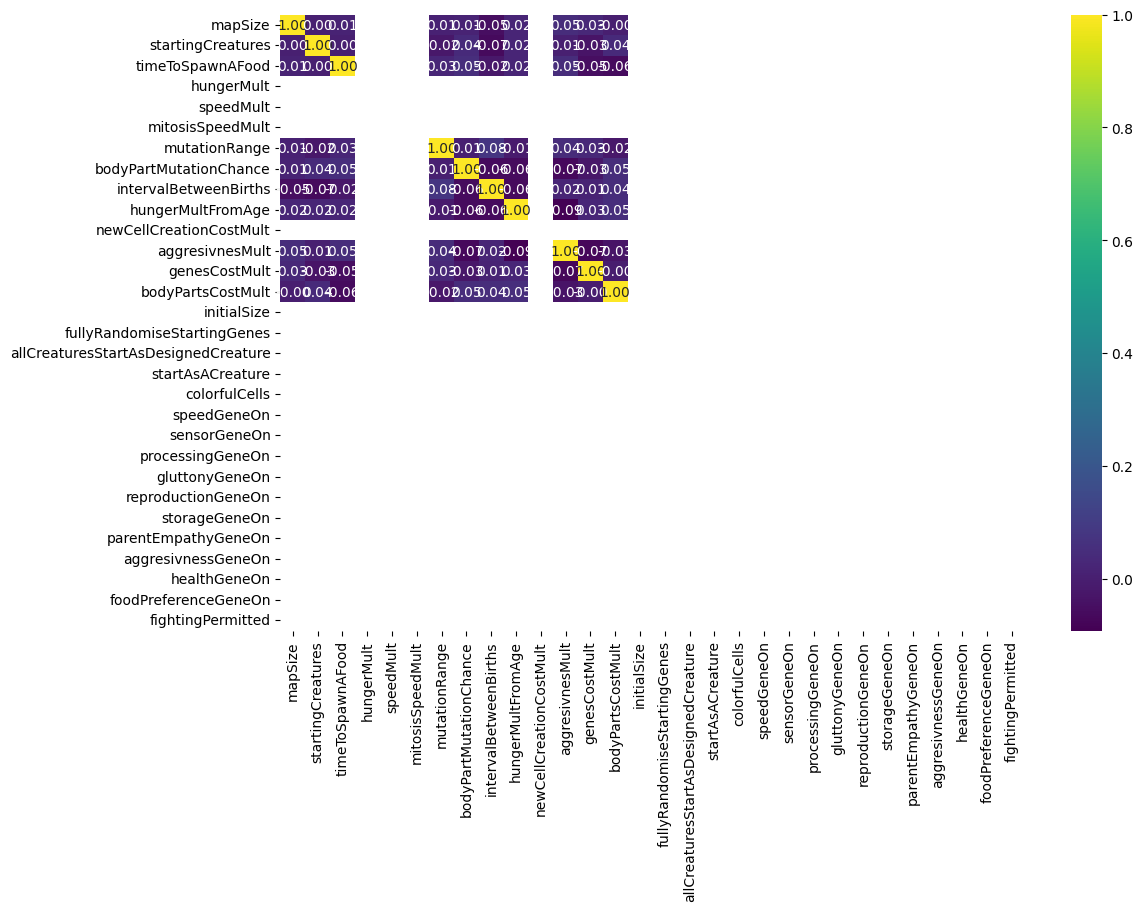

In [347]:
correlation_matrix(initial_parameters)

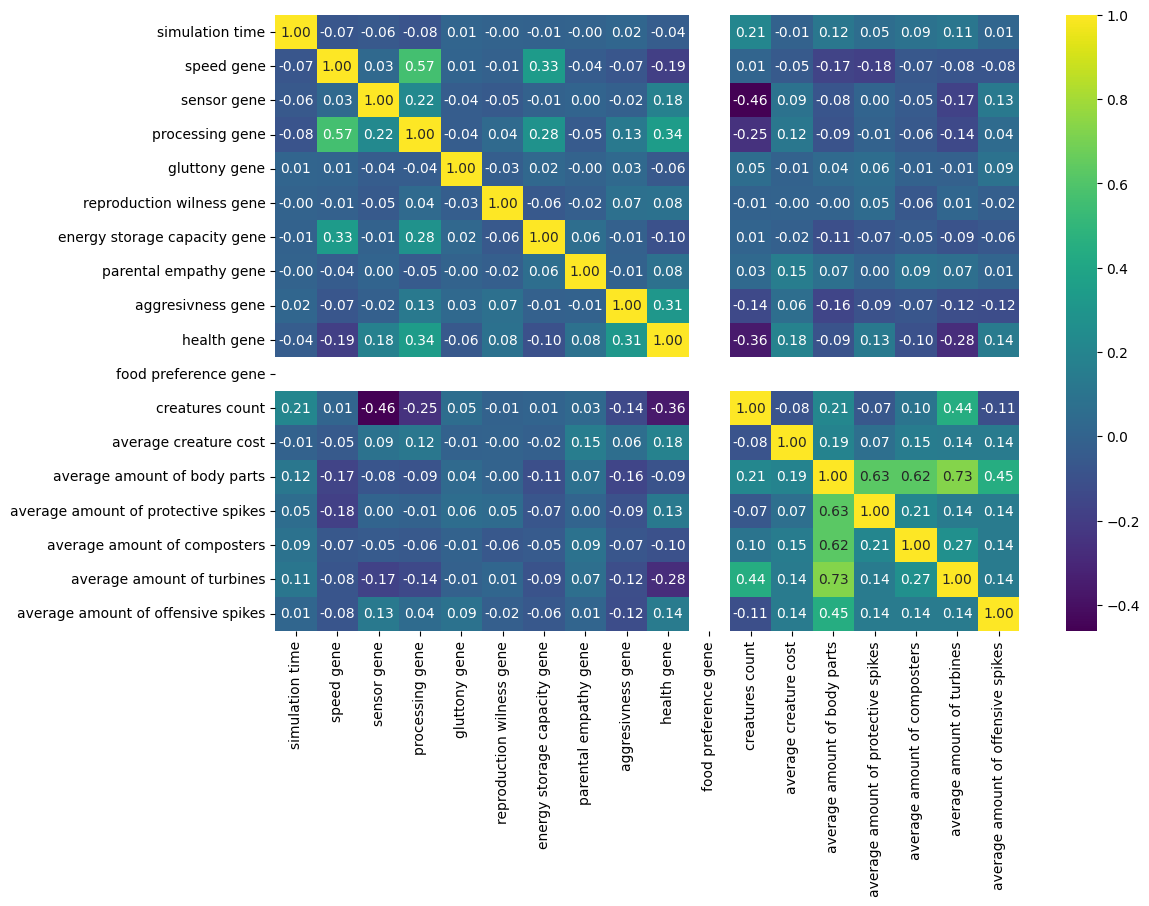

In [348]:
correlation_matrix(results)

It is clear from the data, that many columns can be dropped from initial parameters, and at least one from results.

# Cleaning Data

In [349]:
initial_parameters: DataFrame = initial_parameters.drop(
    columns=[
        "hungerMult",
        "speedMult",
        "mitosisSpeedMult",
        "newCellCreationCostMult", 
        "initialSize", 
        "fullyRandomiseStartingGenes", 
        "allCreaturesStartAsDesignedCreature", 
        "startAsACreature",
        "colorfulCells", 
        "speedGeneOn", 
        "sensorGeneOn", 
        "processingGeneOn", 
        "gluttonyGeneOn",
        "reproductionGeneOn", 
        "storageGeneOn", 
        "parentEmpathyGeneOn", 
        "aggresivnessGeneOn", 
        "healthGeneOn", 
        "foodPreferenceGeneOn", 
        "fightingPermitted"
        ]
    ).dropna()

results: DataFrame = results.drop(
    columns=[        
        "simulation time", 
        "food preference gene"
        ]
    )

results = results.loc[:, ~results.columns.str.contains('^Unnamed')];

Simulation time was also dropped, because only simulations, that stopped ~ 4500 simulation seconds (the maximum time), are analysed

In [350]:
print(results.iloc[0])

speed gene                              0.991227
sensor gene                             0.416732
processing gene                         0.814775
gluttony gene                           0.573346
reproduction wilness gene               0.307748
energy storage capacity gene            0.733310
parental empathy gene                   0.345123
aggresivness gene                       0.866806
health gene                             0.861556
creatures count                        18.000000
average creature cost                  39.924390
average amount of body parts            0.000000
average amount of protective spikes     0.000000
average amount of composters            0.000000
average amount of turbines              0.000000
average amount of offensive spikes      0.000000
Name: 9, dtype: float64


In [351]:
print(initial_parameters.iloc[0])

mapSize                   23.761980
startingCreatures         15.000000
timeToSpawnAFood           4.529128
mutationRange              0.383709
bodyPartMutationChance     0.005873
intervalBetweenBirths     64.644820
hungerMultFromAge          0.003437
aggresivnesMult            1.202730
genesCostMult              0.254597
bodyPartsCostMult          0.791882
Name: 0, dtype: float64


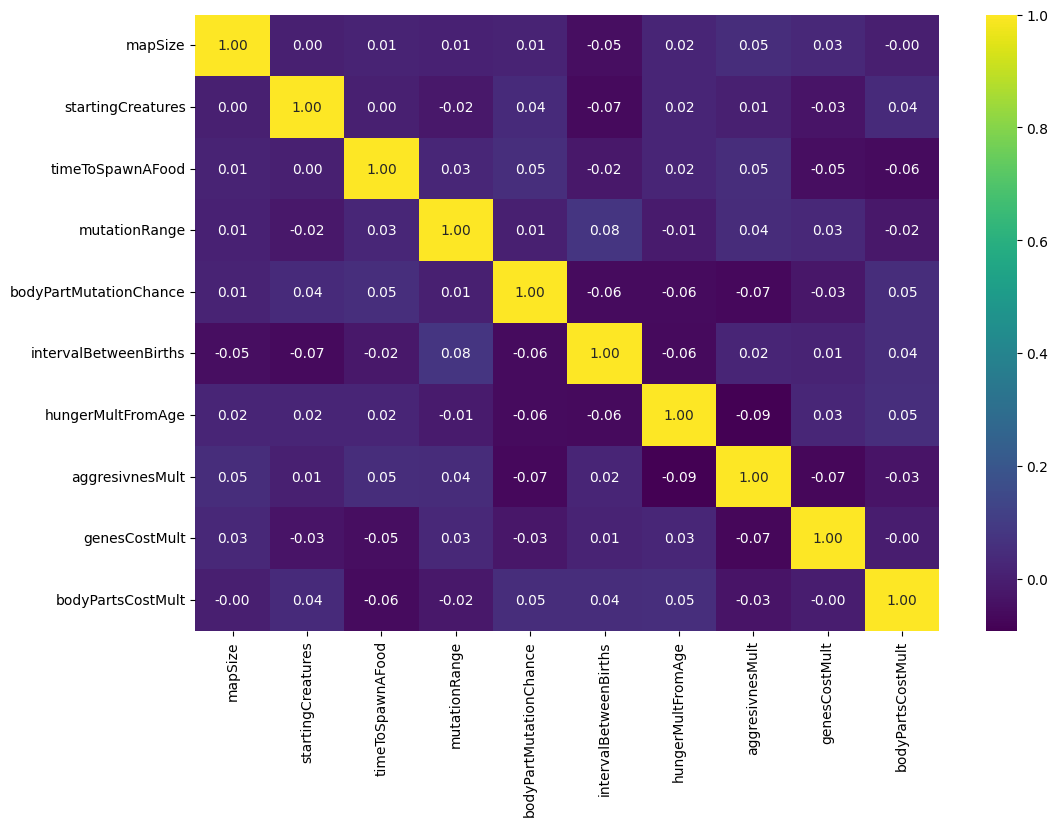

In [352]:
correlation_matrix(initial_parameters)

Correlation of one initial parameter to another is close to zero, as expected. <br>
The initial parameters were generated upon creating the simulation with the help of this custom random power function:

```csharp

float GenerateRandomValue(float min, float max, float mean)
{
    float meanWeight = meanWeightMultiplier * Random.value;

    float x = (Random.value + .5f * meanWeight) / (1 + meanWeight);

    float value = CustomPowerFunction(x, min, max, mean);

    return value;
}

float CustomPowerFunction(float x, float min, float max, float mean)
{
    float meanInterpolated = (mean - min) / (max - min);

    return Mathf.Pow(x, Mathf.Log(meanInterpolated, 0.5f)) * (max - min) + min;
}

Initial parameters, that were set in InitialSettingsInjector.cs in the game:

```csharp

PlayerPrefs.SetFloat("mapSize", GenerateRandomValue(20, 100, 40));

PlayerPrefs.SetFloat("startingCreatures", GenerateRandomValue(1, 60, 25));

PlayerPrefs.SetFloat("timeToSpawnAFood", 1f / GenerateRandomValue(0.1f, 15, 4));

PlayerPrefs.SetFloat("mutationRange", GenerateRandomValue(0.01f, 1f, 0.1f));

PlayerPrefs.SetFloat("bodyPartMutationChance", GenerateRandomValue(0.005f, 1f, 0.05f));

PlayerPrefs.SetFloat("intervalBetweenBirths", GenerateRandomValue(0, 100, 40));

PlayerPrefs.SetFloat("hungerMultFromAge", GenerateRandomValue(0, 3f / 300f, 1f / 300f));

PlayerPrefs.SetFloat("newCellCreationCostMult", 1);

PlayerPrefs.SetFloat("aggresivnesMult", GenerateRandomValue(0, 5, 1));

PlayerPrefs.SetFloat("genesCostMult", GenerateRandomValue(0, 5, 1));

PlayerPrefs.SetFloat("bodyPartsCostMult", GenerateRandomValue(0, 5, 1));

46.72893267281485


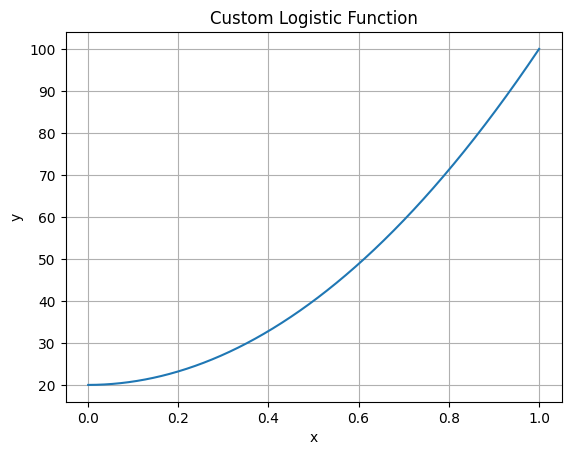

In [353]:
import numpy as np
import math
import matplotlib.pyplot as plt

def custom_logistic(x, minimum, maximum, mean):    
    m_inter = (mean-minimum)/(maximum-minimum)
       
    return x**math.log(m_inter, 0.5) * (maximum-minimum) + minimum

minimum = 20
maximum = 100
mean = 40

mnx: float = (mean - minimum) / (maximum - minimum)

x_values = np.linspace(0.001, 1, 1000)
y_values = custom_logistic(x_values, minimum, maximum, mean)

print(sum(custom_logistic(random.uniform(0., 1.), minimum, maximum, mean) for _ in range(100000)) / 100000)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Logistic Function')
plt.grid(True)
plt.show()

The goal was to create a function, that 50% of y values generated are small then the picked "mean", and another 50% above it. <br>
The average != mean, and for this example, it's closer to 46.6. Still, this is a decent way to generate random initial parameters non-linearly.

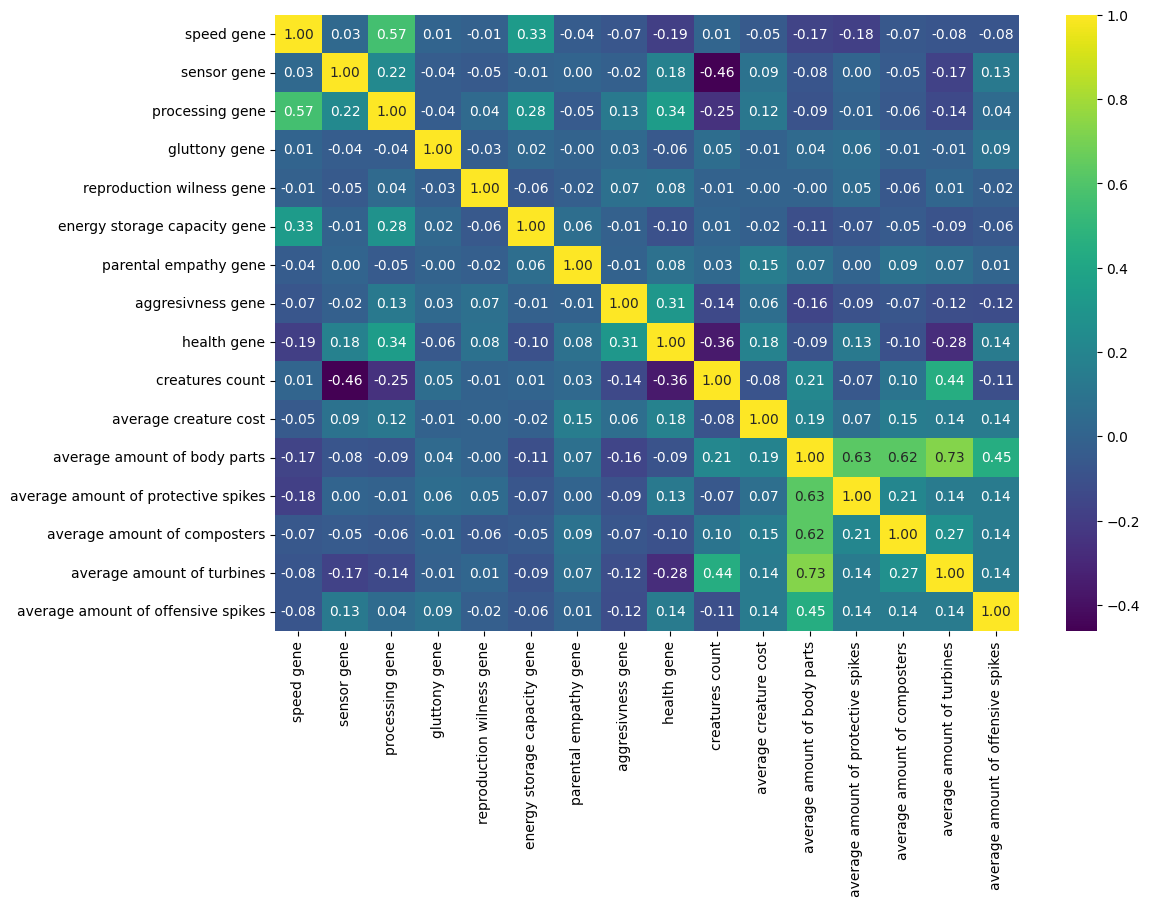

In [354]:
correlation_matrix(results)

Many interesting correlations can be observed with just this correlation matrix. <br><br>
Some of them are obvious - average amount of body parts is based on the average amounts of other body parts. <br><br>
There is a strong correlation between the food processing gene and the speed gene. With more creatures, it is less advantageous to have a better developed sensory gene. <br><br>
A pretty interesting strong correlation is between creature count and average amount of turbines. It seems like with more creatures, it's important to get to food before others. Than again, the same correlation is not observed between creature count and speed gene. There could be many explanations, including an unintentional bug in game - data was collected with simulation speed of 16, which is quite large. Because of that, creatures with high speed can "miss" food, because they have less frames to adjust their movement. Turbines greatly increase turning speed, while the speed gene doesn't.

# Estimating results from initial parameters

In [355]:
def estimate(model, initial_parameters, results):
    regressed = model.fit(initial_parameters, results)
    return regressed
        
for column in results.columns:
    analyzed_column = results[column]
        
    x_train, x_test, y_train, y_test = train_test_split(initial_parameters, analyzed_column, test_size=0.2)
        
    reg: LinearRegression = estimate(LinearRegression(), x_train, y_train)
    
    print(f"{column} : {reg.score(initial_parameters, analyzed_column)}")

speed gene : 0.2999380470286511
sensor gene : 0.26771802417618595
processing gene : 0.569455650427825
gluttony gene : 0.01616399921100009
reproduction wilness gene : 0.00040388258607715333
energy storage capacity gene : 0.1739161923263196
parental empathy gene : 0.05508113181426699
aggresivness gene : 0.07196272451744778
health gene : 0.44952926010356
creatures count : 0.6868547216116432
average creature cost : 0.8053640623763357
average amount of body parts : 0.49371575228487086
average amount of protective spikes : 0.22482972084879838
average amount of composters : 0.212627564376629
average amount of turbines : 0.3600007917185303
average amount of offensive spikes : 0.15518047248427924


Some of the scores are high enough to suggest high correlation. The highest is for creatures count. Many are too low to estimate succesfully with this model.

# Estimating Average Creature Cost from Initial Parameters

This report will focus on trying to estimate average creature cost, first from just the initial parameters, and later from the other results too. 

In [356]:
ANALYZED = "average creature cost"

analyzed_column = results[ANALYZED]
print(analyzed_column)

9     39.924390
9     54.034379
9    102.759808
9     47.087807
9     55.423389
        ...    
9     51.361896
9     40.887936
9     84.137881
9     34.042621
9     85.135107
Name: average creature cost, Length: 546, dtype: float64


In [357]:

df_1: DataFrame = initial_parameters.copy()

df_1[ANALYZED] = list(analyzed_column)

print(df_1.head())

    mapSize  startingCreatures  timeToSpawnAFood  mutationRange  \
0  23.76198               15.0          4.529128       0.383709   
0  24.69442               18.0          2.010151       0.286781   
0  44.97563               15.0          6.406969       0.767422   
0  38.97704               41.0          3.277926       0.022458   
0  25.28580               28.0          3.036764       0.092825   

   bodyPartMutationChance  intervalBetweenBirths  hungerMultFromAge  \
0                0.005873               64.64482           0.003437   
0                0.013992               10.22332           0.005131   
0                0.191583               41.19628           0.004297   
0                0.012400               68.63533           0.005164   
0                0.025843               38.36862           0.001853   

   aggresivnesMult  genesCostMult  bodyPartsCostMult  average creature cost  
0         1.202730       0.254597           0.791882              39.924390  
0         1.10

# Removing Outliers

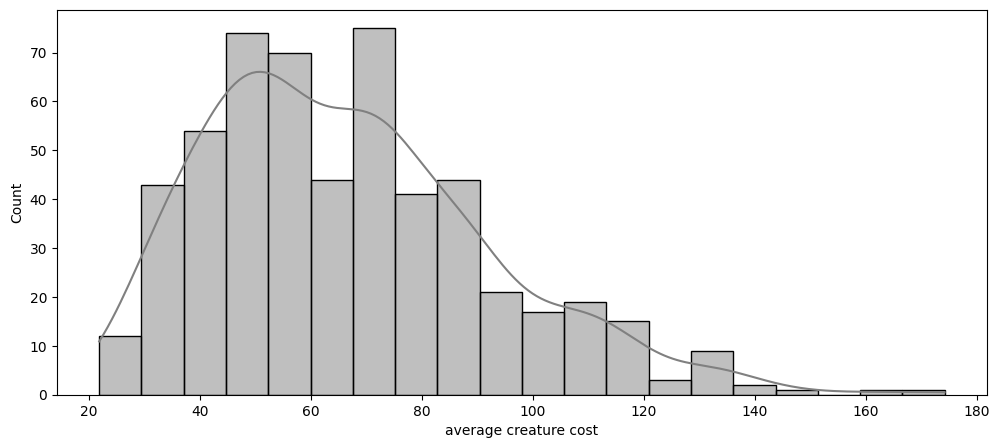

In [358]:
plt.figure(figsize=(12,5))
sns.histplot(df_1[ANALYZED],bins=20,kde=True,color='gray')
plt.show()

In [359]:
import pandas as pd
import numpy as np

def detect_outliers(df, column_name):
    """
    Detect outliers in a specific column using the 3-sigma rule.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column for outlier detection.
    
    Returns:
    pd.Series: Boolean series indicating the presence of outliers.
    """
    mean = df[column_name].mean()
    std = df[column_name].std()
    threshold = 3 * std
    
    outliers = (df[column_name] < (mean - threshold)) | (df[column_name] > (mean + threshold))
    return outliers


def remove_outliers(df, column_name):
    """
    Remove outliers from a DataFrame based on the 3-sigma rule.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column for outlier detection.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    outliers = detect_outliers(df, column_name)
    df_clean = df[~outliers]
    return df_clean

outliers = detect_outliers(df_1, ANALYZED)

print(df_1[outliers][ANALYZED])


0    160.716295
0    174.161780
0    147.501538
Name: average creature cost, dtype: float64


The outliers will be removed.

In [360]:
df_1 = remove_outliers(df_1, ANALYZED)

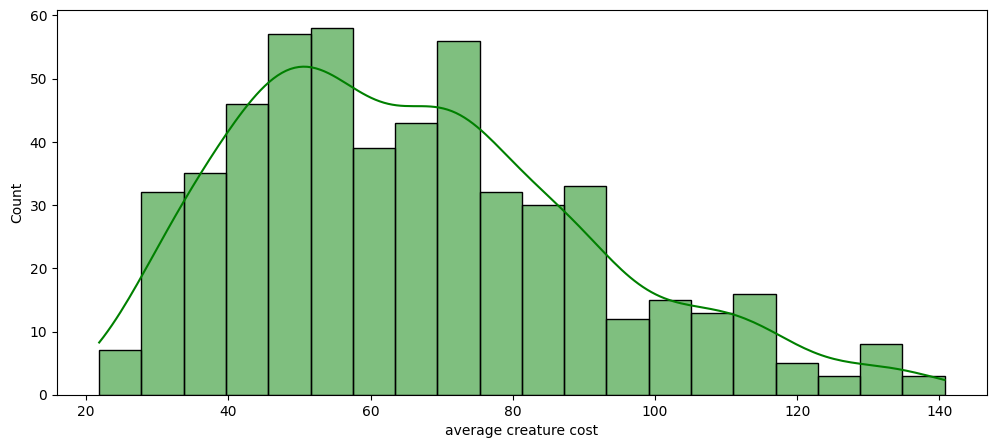

In [361]:
plt.figure(figsize=(12,5))
sns.histplot(df_1[ANALYZED],bins=20,kde=True,color='green')
plt.show()

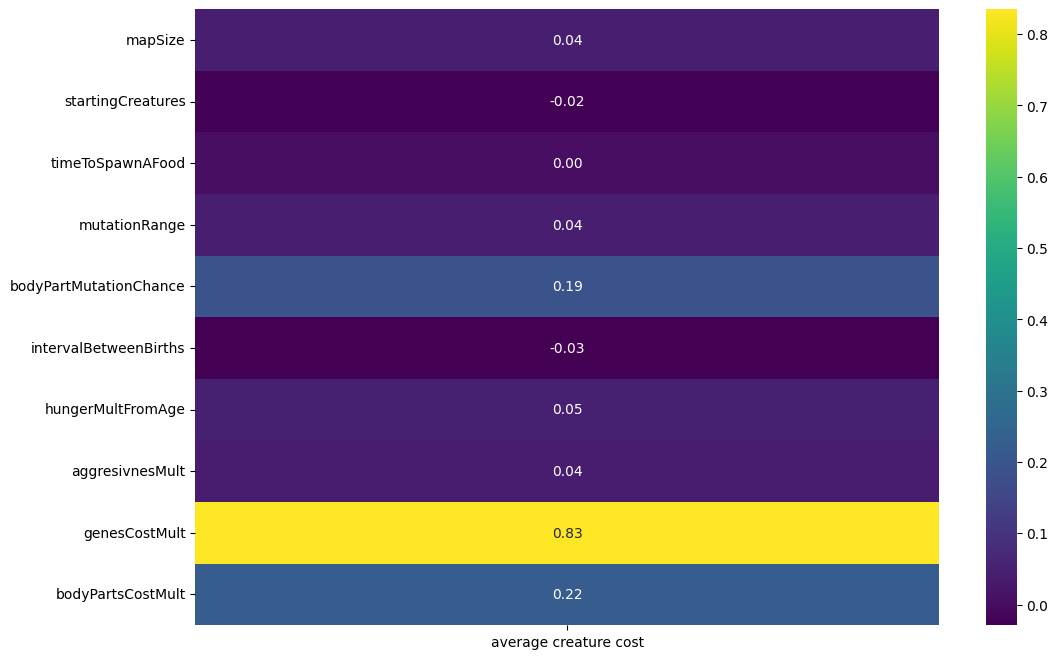

In [362]:
correlation_column(df_1, ANALYZED)

Only three parameters will be kept: genesCostMult, bodyPartMutationChance i bodyPartsCostMult.

In [363]:
df_1 = df_1.loc[
    :,
    df_1.columns.intersection(
        [
            "genesCostMult",
            "bodyPartMutationChance",
            "bodyPartsCostMult",
            "average creature cost",
        ]
    ),
]


# Linear Regression

In [364]:
def regress(x, y) -> LinearRegression:    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    reg: LinearRegression = estimate(
        LinearRegression(), x_train, y_train
    )
    print(f"Regression coefficients: {reg.coef_}")
    print(
        f"Regression score on test data: {reg.score(x_test, y_test)}"
    )
    print(f"Regression score on train data: {reg.score(x_train, y_train)}")
    print(f"Regression score on full data: {reg.score(x, y)}")
    
    return reg


In [400]:
X = df_1.drop(columns=[ANALYZED])
y = df_1[ANALYZED]

scaler = StandardScaler()
X = scaler.fit_transform(X, y)

regress(X, y);

Regression coefficients: [ 5.29178605 20.98921178  5.5731788 ]
Regression score on test data: 0.8031864002167397
Regression score on train data: 0.7837762753894901
Regression score on full data: 0.7880277272770038


This regression score is quite high. It would've been low, if not for gene cost multiplier.

# Scatter Plots

In [497]:
def visualise_scatter(x, y, data, show_reg=True, xlim=None, ylim=None, save=False) -> None:
    plt.figure(figsize=(12,5))
    sns.scatterplot(data=data,x=x,y=y,hue=y,palette='RdYlGn')
    if show_reg:
        sns.regplot(data=data,x=x,y=y,scatter=False,truncate=True,order=3,color='0.2')
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.show()
    if save:
        plt.savefig(f"report/images/{x}")

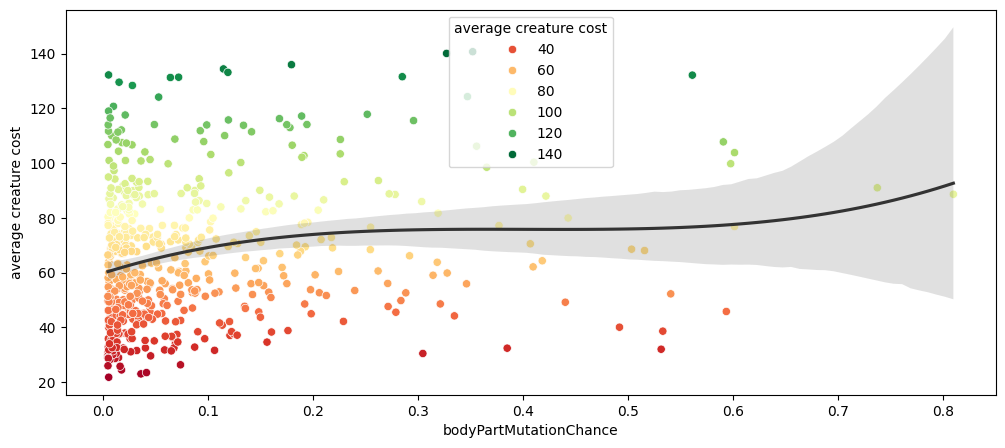

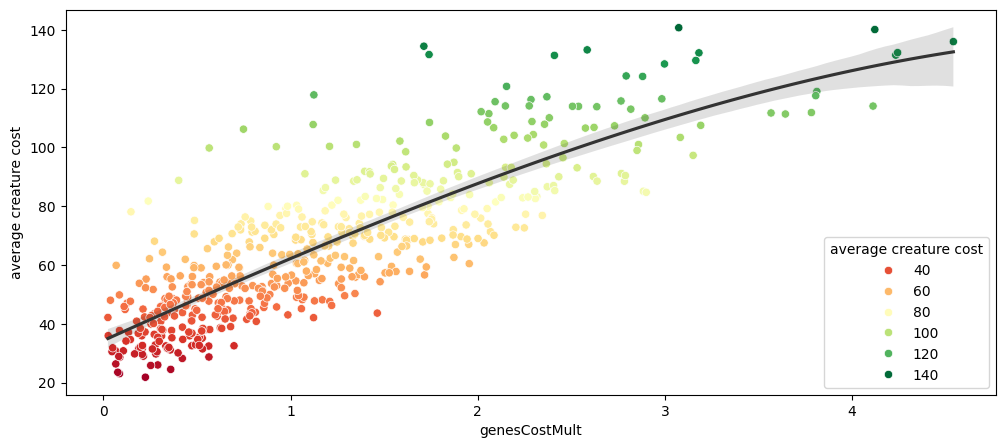

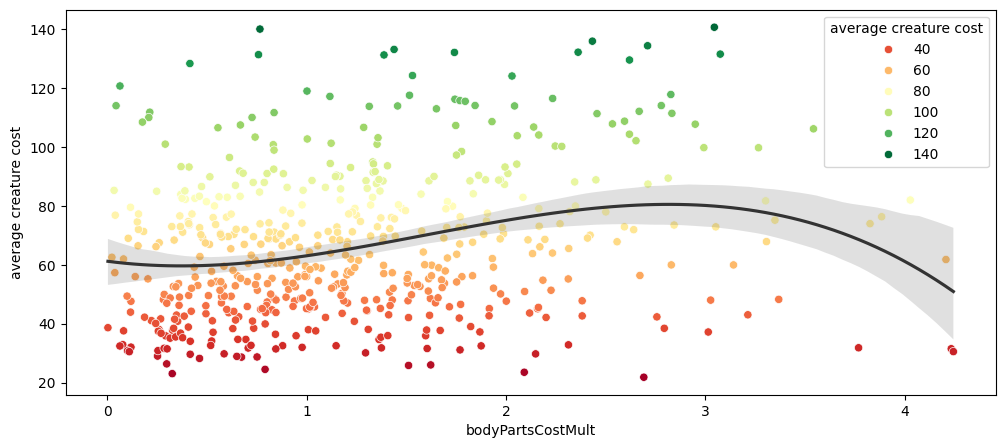

In [492]:
for i in df_1.columns[:-1]:
    visualise_scatter(
        x=i,
        y=ANALYZED,
        data=df_1,
        show_reg=True
        )

# Estimating Average Creature Cost from Initial Parameters and Results

Perhaps regression based on the simulation result data and the simulation's initial parameters will be stronger.

In [474]:
df_2: DataFrame = initial_parameters.copy()

df_2 = df_2.reset_index(drop=True)
results: DataFrame = results.reset_index(drop=True)
df_2 = pd.concat([df_2, results], axis=1)
print(df_2.head())

    mapSize  startingCreatures  timeToSpawnAFood  mutationRange  \
0  23.76198               15.0          4.529128       0.383709   
1  24.69442               18.0          2.010151       0.286781   
2  44.97563               15.0          6.406969       0.767422   
3  38.97704               41.0          3.277926       0.022458   
4  25.28580               28.0          3.036764       0.092825   

   bodyPartMutationChance  intervalBetweenBirths  hungerMultFromAge  \
0                0.005873               64.64482           0.003437   
1                0.013992               10.22332           0.005131   
2                0.191583               41.19628           0.004297   
3                0.012400               68.63533           0.005164   
4                0.025843               38.36862           0.001853   

   aggresivnesMult  genesCostMult  bodyPartsCostMult  ...  \
0         1.202730       0.254597           0.791882  ...   
1         1.104876       0.536166           0.89

# Cleaning Data

In [475]:
df_2 = remove_outliers(df_2, ANALYZED)

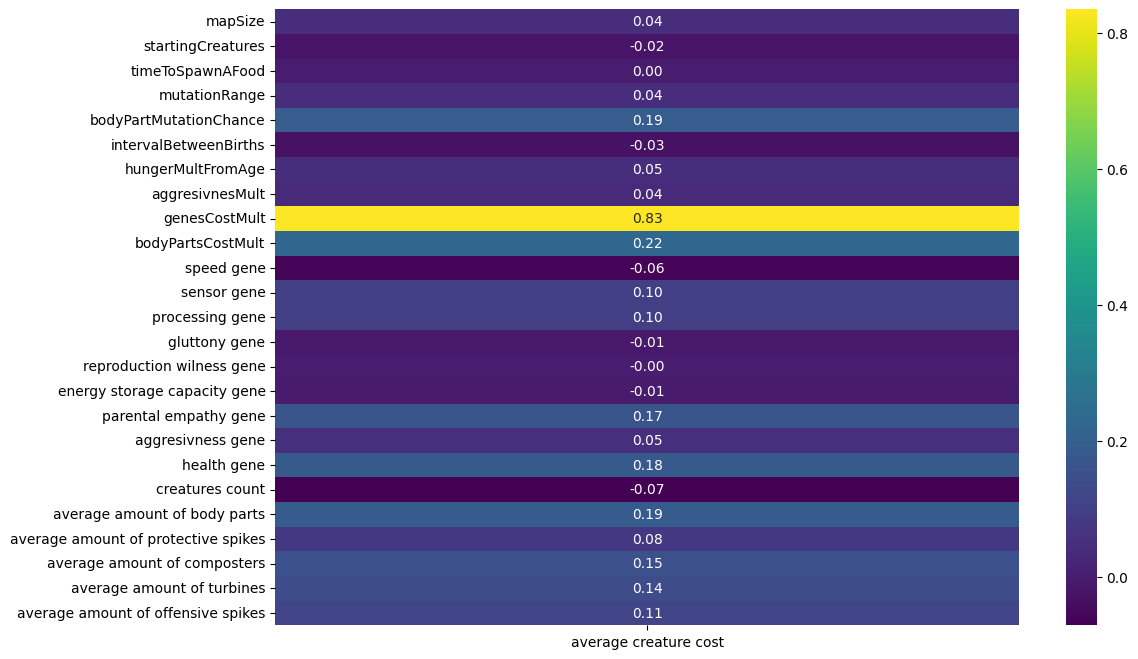

In [476]:
correlation_column(df_2, ANALYZED)

The correlations' strength seems to be more promising now. Let's keep the previously selected initial parameters (aggresivnesMult, timeToSpawnAFood and genesCostMult), but also add these parameters: speed gene, sensor gene, processing gene, aggresivness gene, health gene, creature count, average amount of turbines and average amount of offensive spikes.

In [511]:
df_2 = df_2.loc[
    :,
    df_2.columns.intersection(
        [
            "bodyPartMutationChance",
            "genesCostMult",
            "speed gene",
            "sensor gene",
            "processing gene",
            "gluttony gene",
            "parental empathy gene",
            "aggresivness gene",
            "health gene",
            "creatures count",
            'average amount of body parts', 
            'average amount of protective spikes',
            'average amount of composters', 
            'average amount of turbines',
            'average amount of offensive spikes',
            "average creature cost"
        ]
    ),
]

In [512]:
df_2.columns

Index(['bodyPartMutationChance', 'genesCostMult', 'speed gene', 'sensor gene',
       'processing gene', 'gluttony gene', 'parental empathy gene',
       'aggresivness gene', 'health gene', 'creatures count',
       'average creature cost', 'average amount of body parts',
       'average amount of protective spikes', 'average amount of composters',
       'average amount of turbines', 'average amount of offensive spikes'],
      dtype='object')

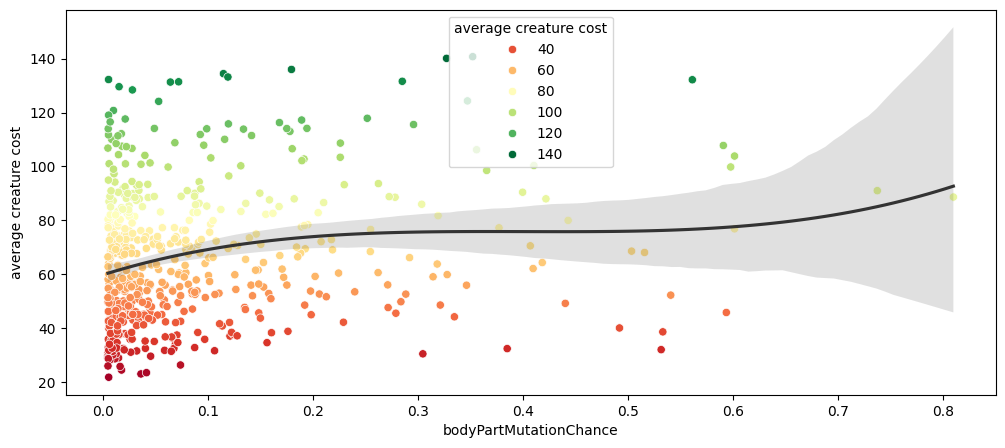

<Figure size 640x480 with 0 Axes>

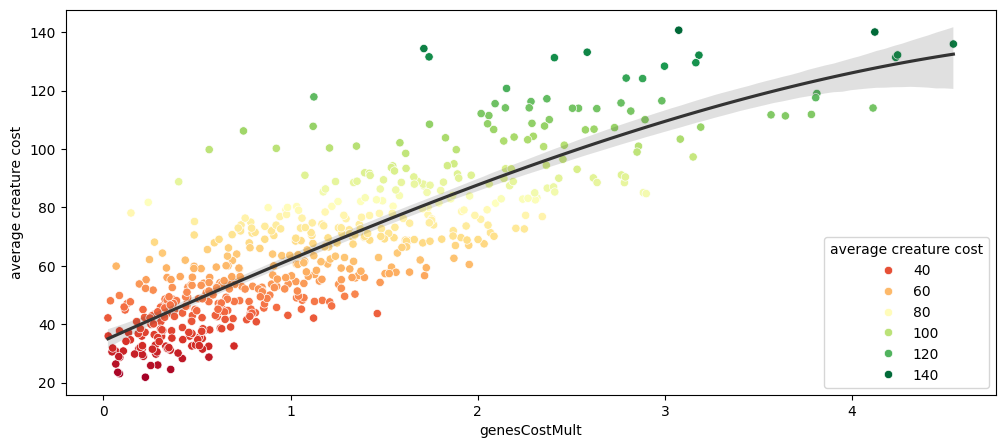

<Figure size 640x480 with 0 Axes>

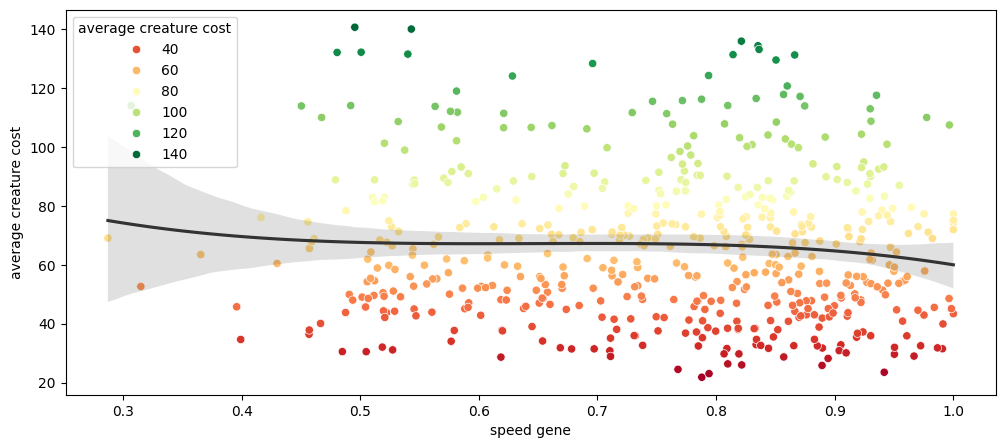

<Figure size 640x480 with 0 Axes>

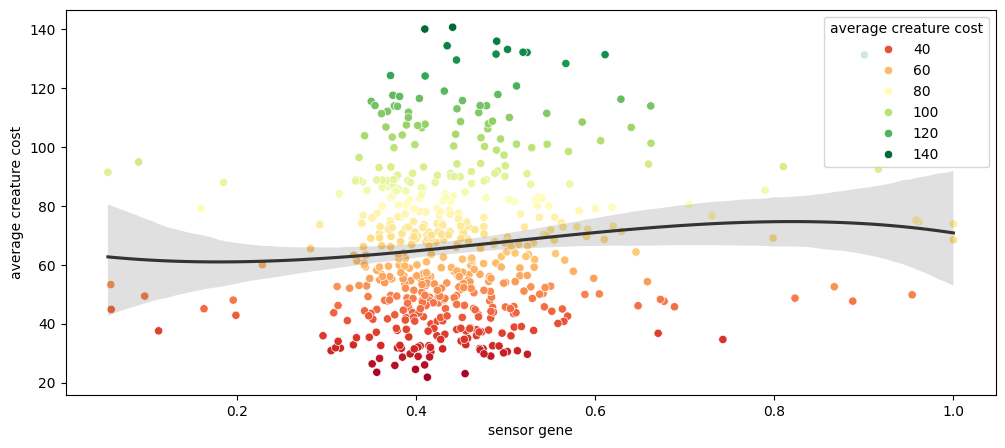

<Figure size 640x480 with 0 Axes>

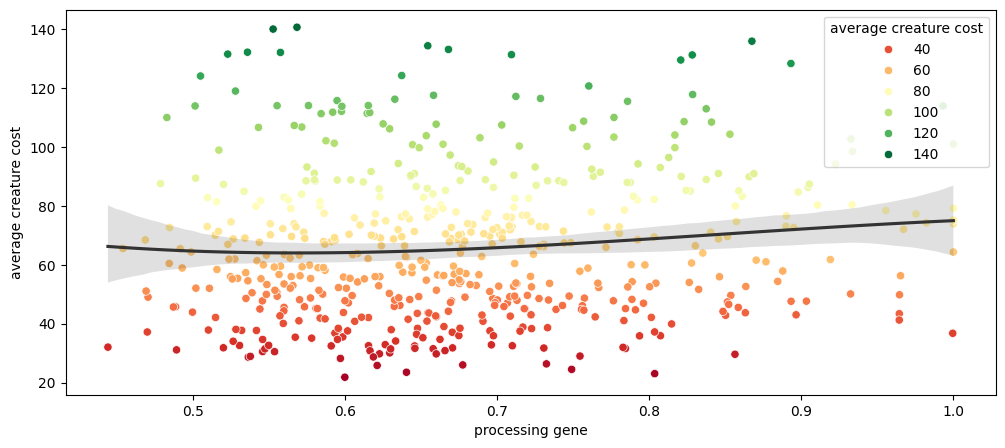

<Figure size 640x480 with 0 Axes>

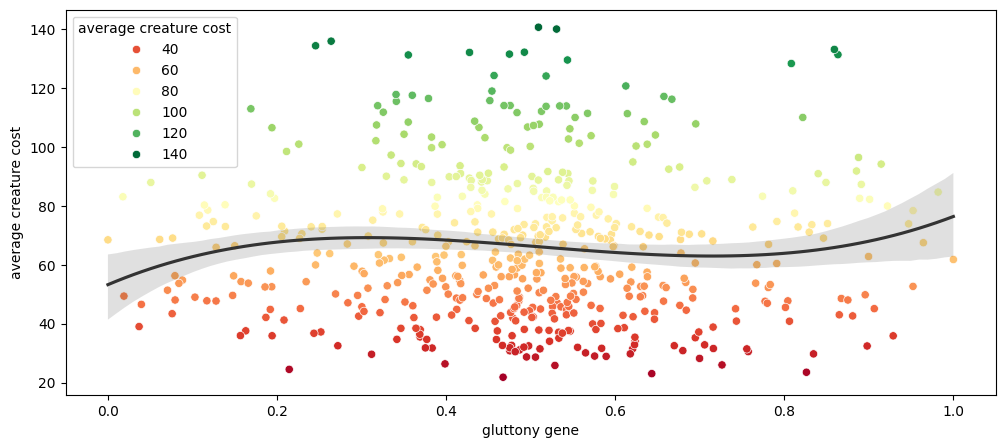

<Figure size 640x480 with 0 Axes>

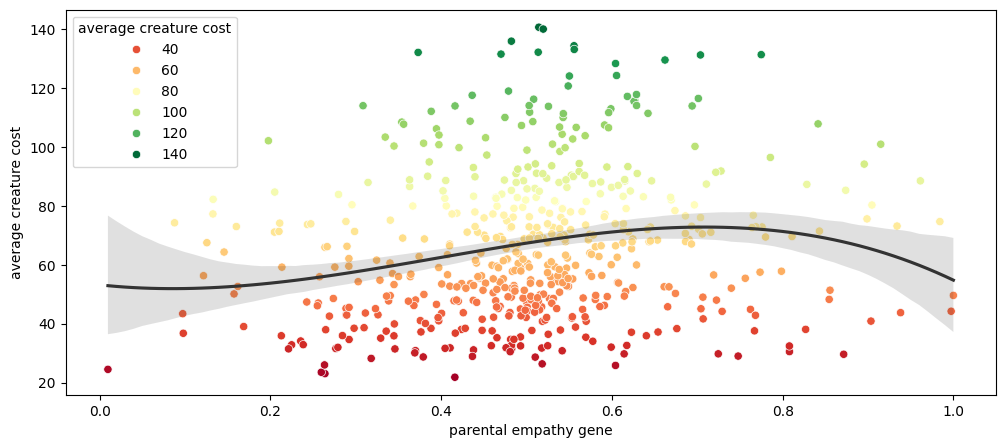

<Figure size 640x480 with 0 Axes>

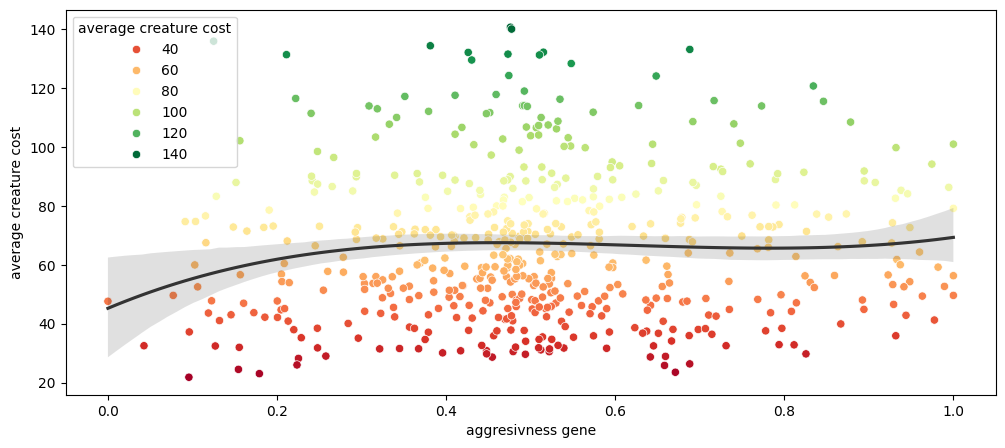

<Figure size 640x480 with 0 Axes>

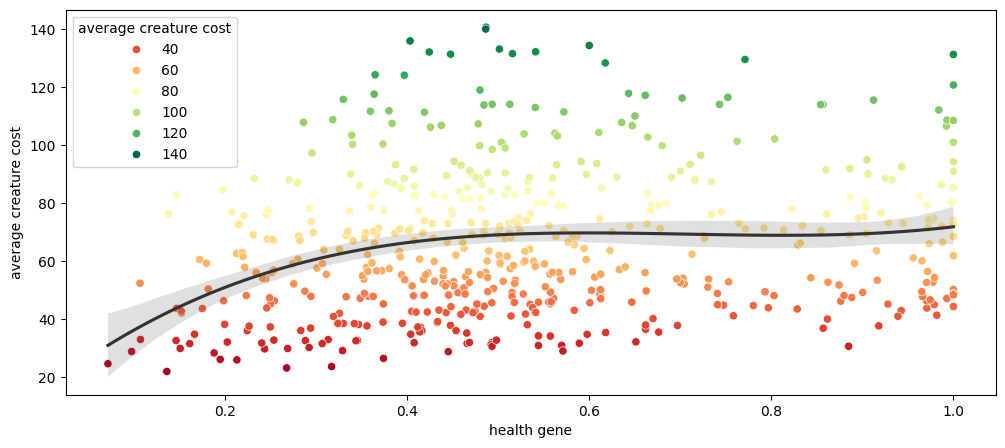

<Figure size 640x480 with 0 Axes>

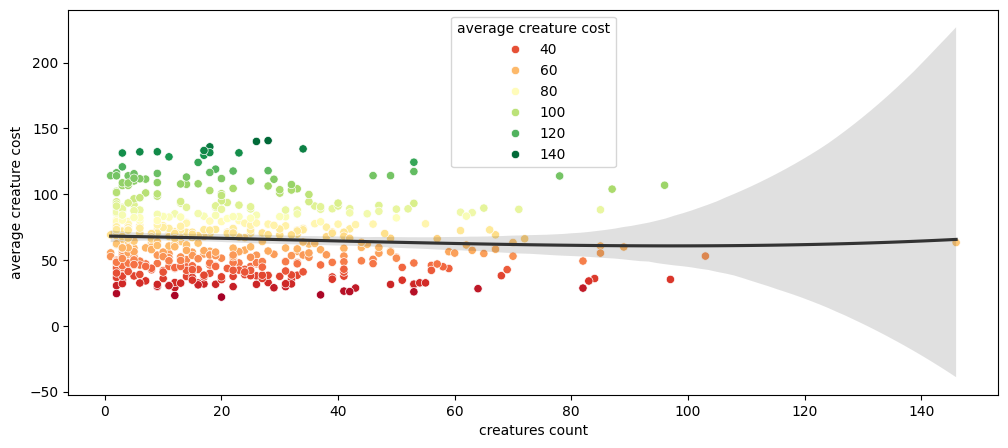

<Figure size 640x480 with 0 Axes>

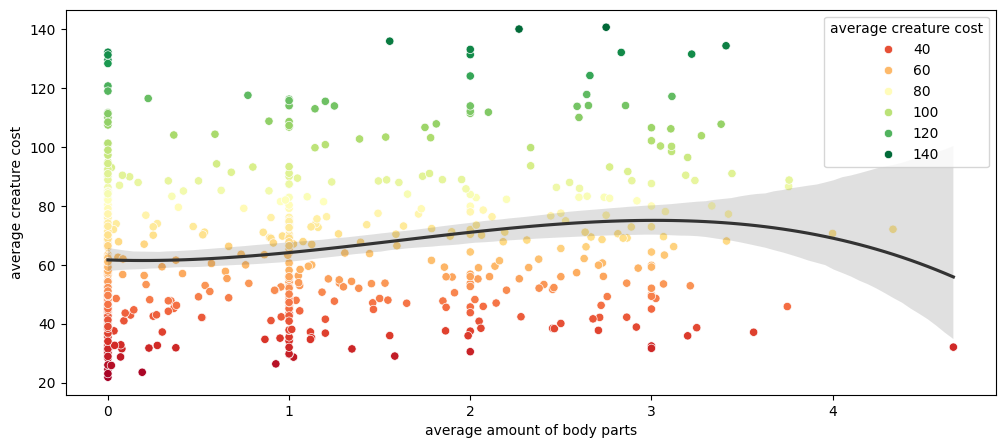

<Figure size 640x480 with 0 Axes>

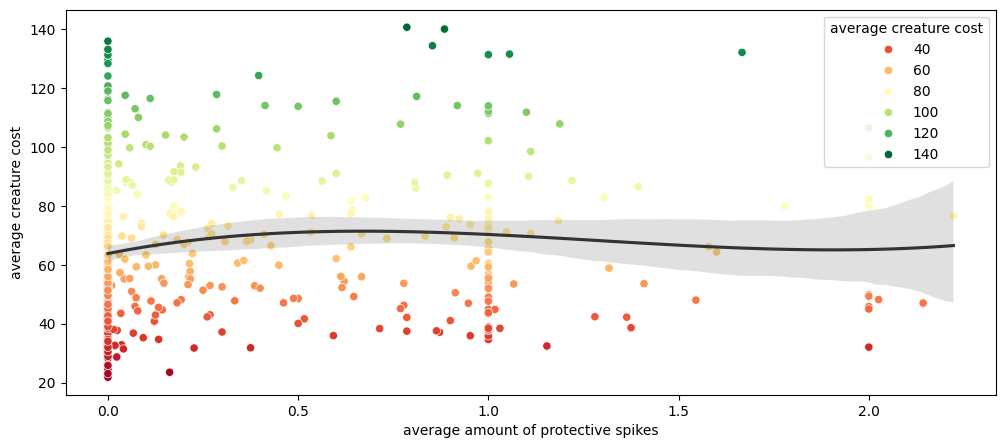

<Figure size 640x480 with 0 Axes>

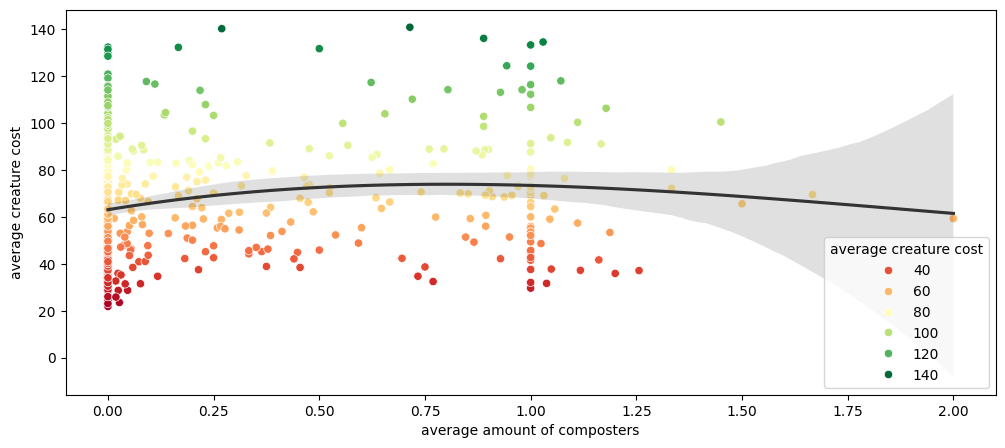

<Figure size 640x480 with 0 Axes>

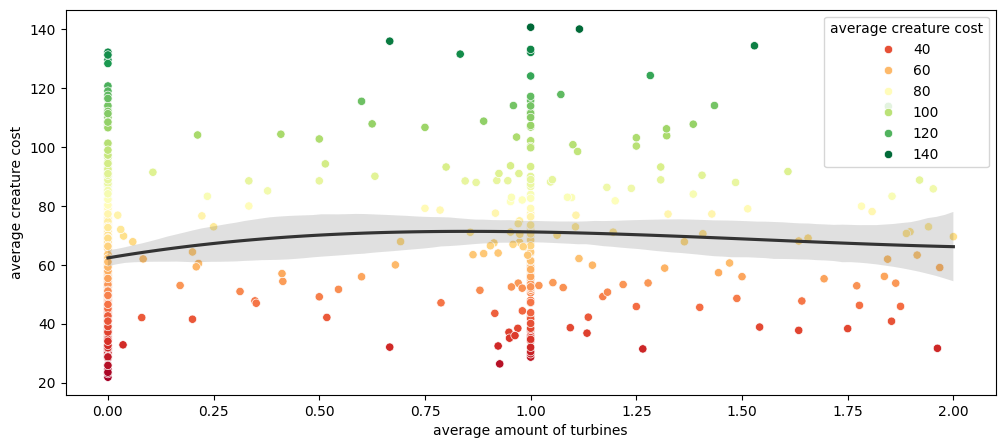

<Figure size 640x480 with 0 Axes>

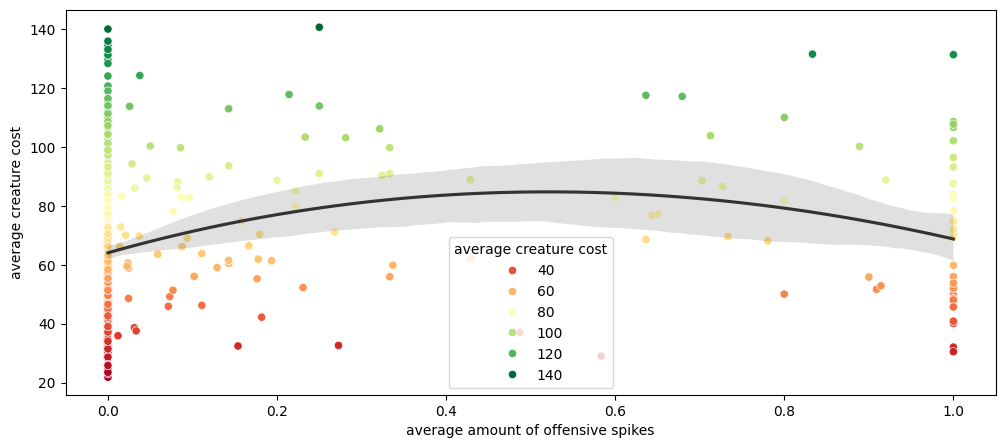

<Figure size 640x480 with 0 Axes>

In [513]:
for i in df_2.drop(columns=[ANALYZED]).columns:
    visualise_scatter(
        x=i,
        y=ANALYZED,
        data=df_2,
        show_reg=True,
        save=True
        )

In [540]:
X = df_2.drop(columns=[ANALYZED])
y = df_2[ANALYZED]

scaler = StandardScaler()
X = scaler.fit_transform(X, y)

reg: LinearRegression = regress(X, y)

Regression coefficients: [ 1.16589607e+00  2.18595165e+01  1.51996221e+00  1.43480260e+00
 -3.89866211e-01 -9.11135664e-02  5.49215347e-01  2.93696006e+00
  6.58669626e+00 -2.00090650e-01 -6.04725615e+06  2.67449618e+06
  2.14423933e+06  3.23263242e+06  1.55741006e+06]
Regression score on test data: 0.8821112454080341
Regression score on train data: 0.8623189184863655
Regression score on full data: 0.8661338361348039


It is now clear that estimation with the result data yields better, but far from perfect regression score. Perhaps the LinearRegression model isn't the right tool for estimating this data?

# Comparing Different Models

In [490]:
X = df_1.drop(columns=[ANALYZED])
y = df_1[ANALYZED]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

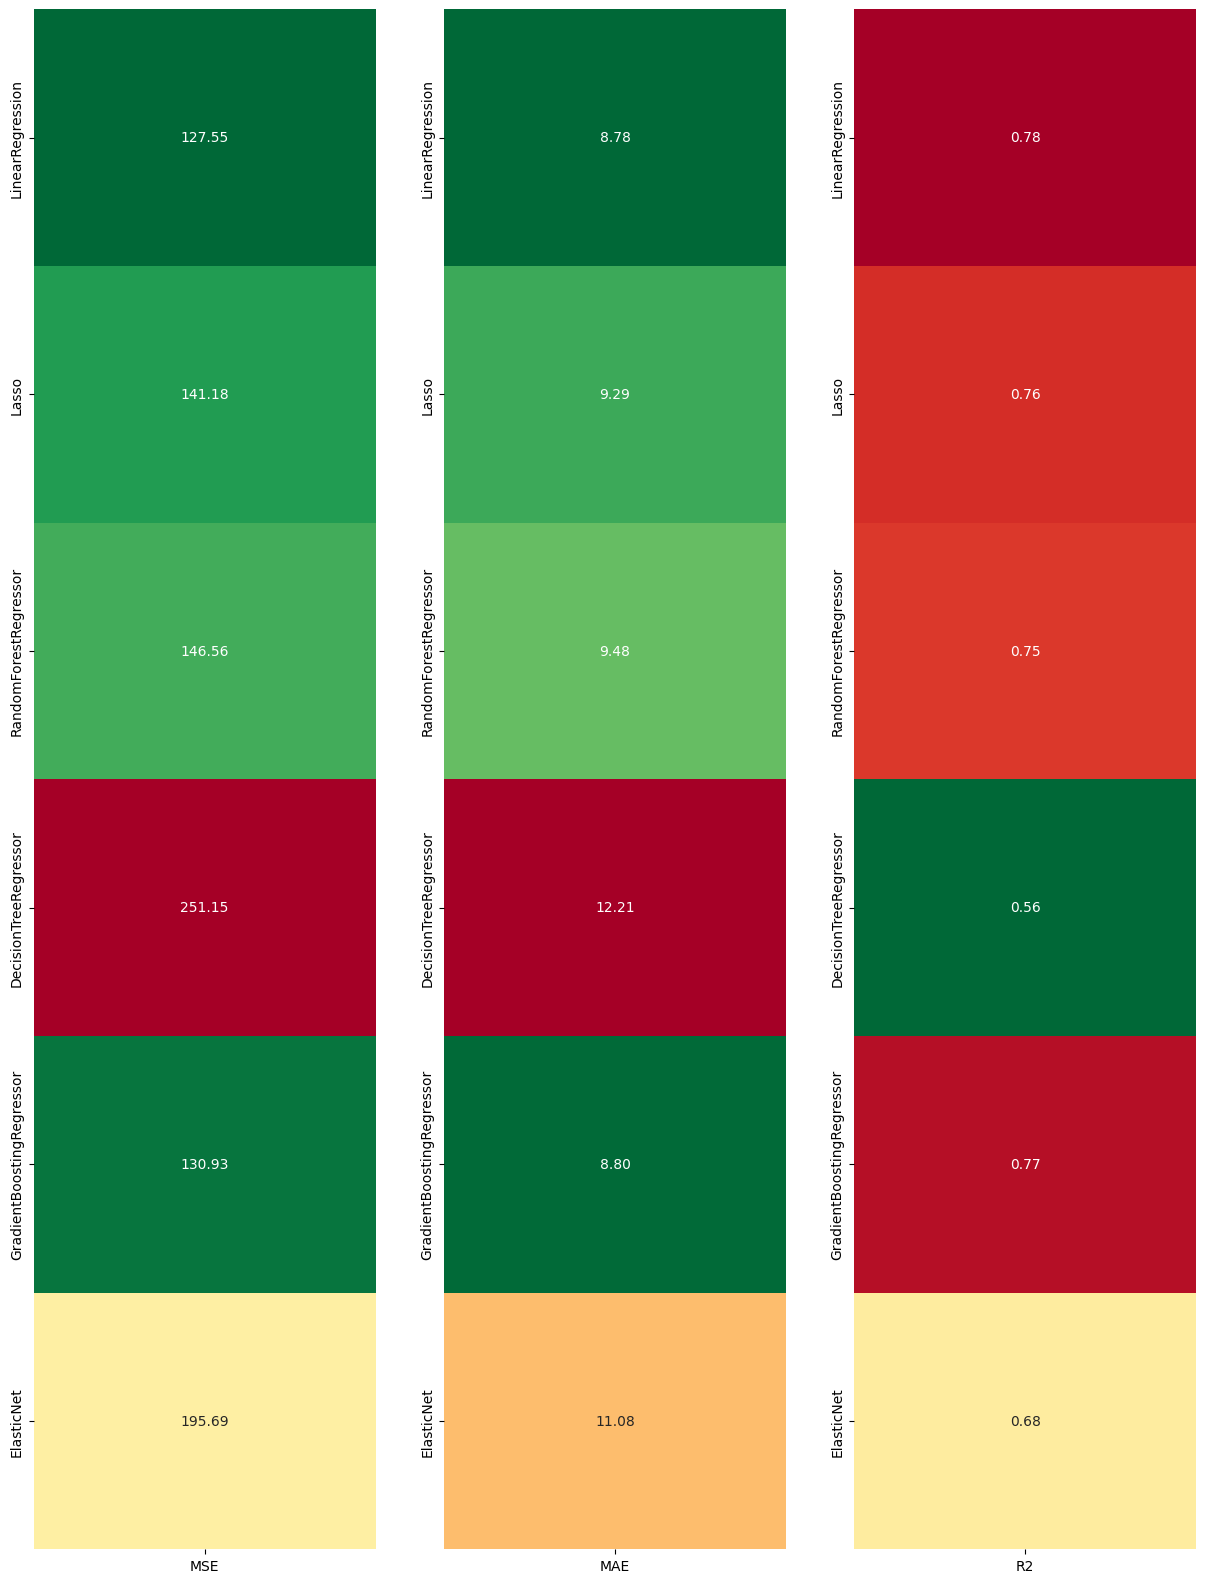

In [491]:
def test_models(x, y, models, repetitions) -> dict:
    """
    Test multiple models using cross-validation and return the average performance metrics.

    Parameters:
    x (array-like): The input features.
    y (array-like): The target variable.
    models (list): A list of machine learning models to test.
    repetitions (int, optional): The number of repetitions for cross-validation. Default is 25.

    Returns:
    dict: A dictionary containing the average performance metrics for each model.

    """
    results = {}
    for _ in range(repetitions):
        for model,name  in zip(models,[model.__class__.__name__ for model in models]):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            for metric, metricname in zip([mean_squared_error,mean_absolute_error,r2_score],['MSE','MAE','R2']):
                if name not in results:
                    results[name] = {}
                if metricname not in results[name]:
                    results[name][metricname] = []
                results[name][metricname].append(metric(y_test,y_pred))
                
    for key in results:
        for metric in results[key]:
            results[key][metric] = np.mean(results[key][metric])
    return results

results = test_models(X_scaled,y,[LinearRegression(),Lasso(),RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),ElasticNet()],repetitions=25)
results_df = pd.DataFrame(results).T
fig, ax= plt.subplots(ncols=3,figsize=(15,20))
sns.heatmap(results_df[['MSE']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[0],cbar=False)
sns.heatmap(results_df[['MAE']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[1],cbar=False)
sns.heatmap(results_df[['R2']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[2],cbar=False)

Three models will be compared: LinearRegression, RandomForestRegressor and GradientBoostingRegressor.

In [299]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [300]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name) -> dict[str, float]:
    mse: float = mean_squared_error(y_true, y_pred)
    mae: float = mean_absolute_error(y_true, y_pred)
    r2: float  = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}")
    
    return {"MSE": mse, "MAE": mae, "R2": r2}

lr_scores: dict[str, float] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_scores: dict[str, float] = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
gbr_scores: dict[str, float] = evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")

scores = pd.DataFrame([lr_scores, rf_scores, gbr_scores], index=["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"])

Linear Regression - MSE: 129.48858573123763, MAE: 8.482714532607627, R2: 0.783097069472159
Random Forest Regressor - MSE: 152.34516624551486, MAE: 9.171796876434467, R2: 0.7448106115006259
Gradient Boosting Regressor - MSE: 140.74240090823687, MAE: 8.996138431226257, R2: 0.7642460991126845


<Axes: >

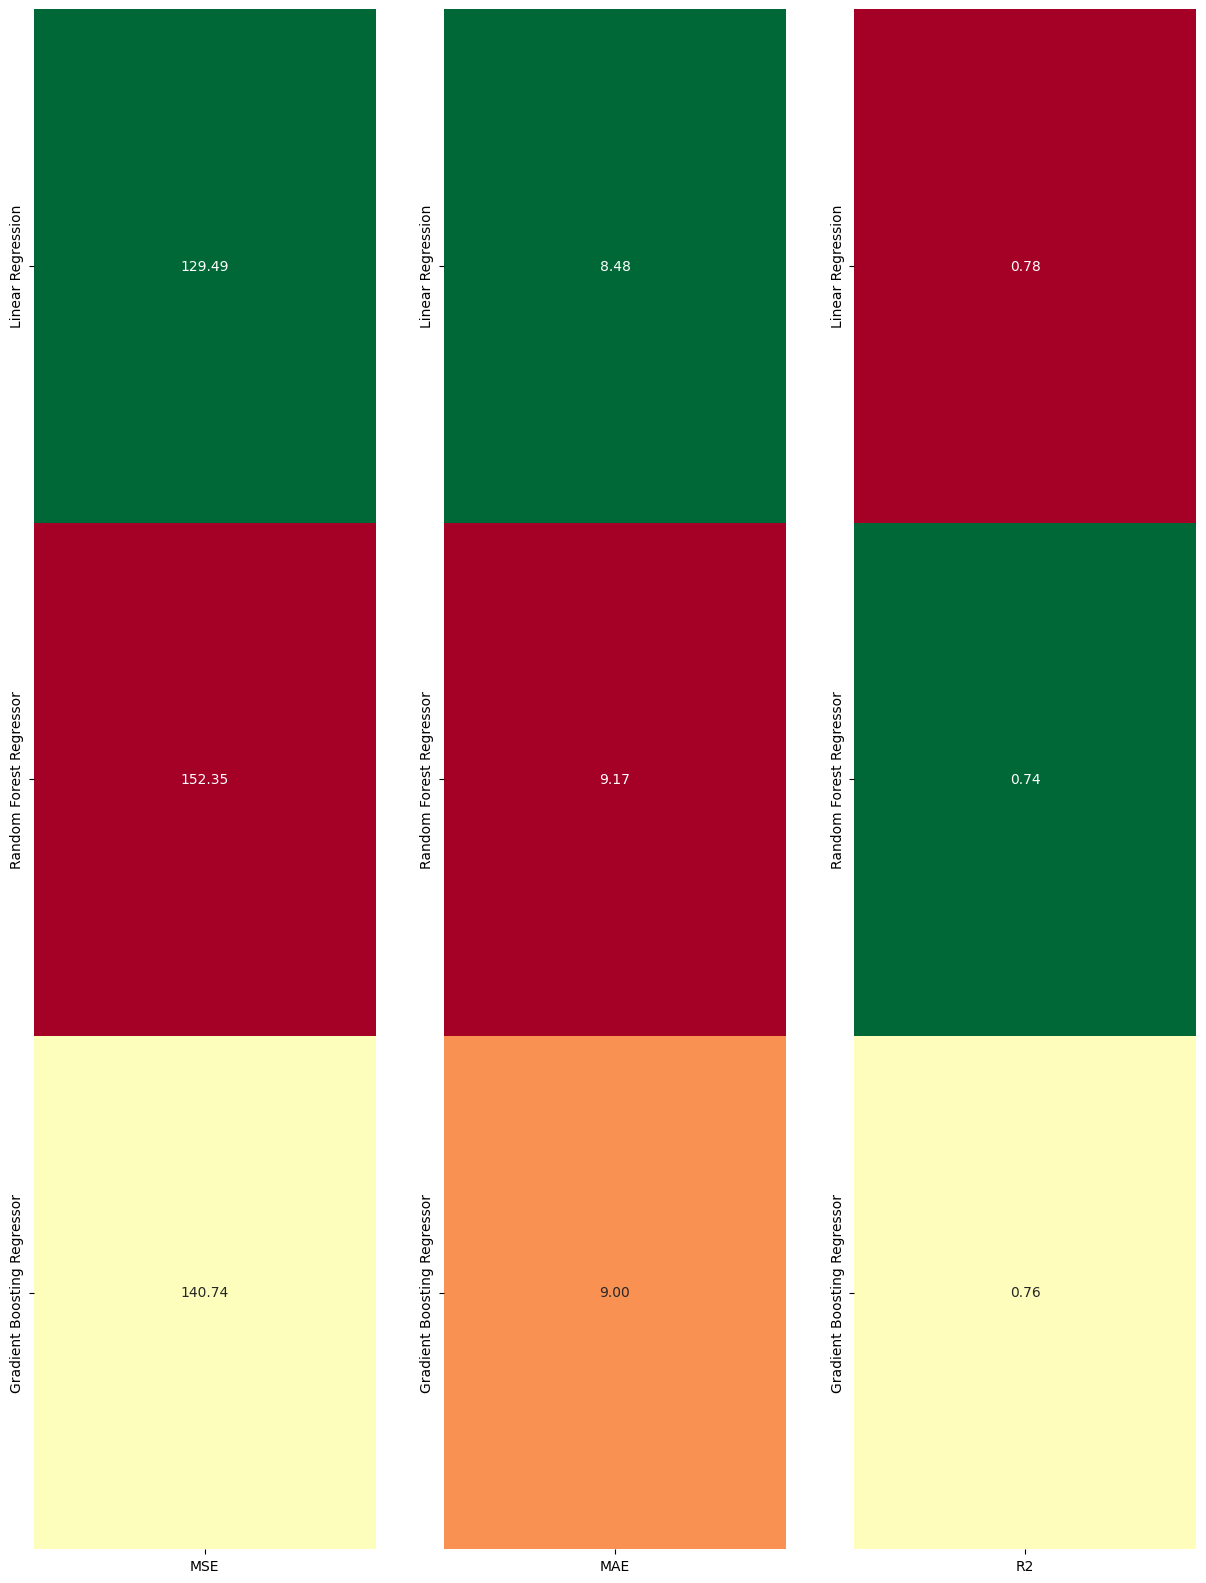

In [301]:
fig, ax= plt.subplots(ncols=3,figsize=(15,20))

sns.heatmap(scores[['MSE']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[0],cbar=False)
sns.heatmap(scores[['MAE']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[1],cbar=False)
sns.heatmap(scores[['R2']], annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[2],cbar=False)

In [302]:
for i in range(10):
    print(f"LR: {y_pred_lr[i]}, RF: {y_pred_rf[i]}, GBR: {y_pred_gbr[i]}, Real: {y_test.iloc[i]}")

LR: 60.128548926256926, RF: 59.16089828027586, GBR: 59.7269095871839, Real: 63.28625719388424
LR: 42.48532064031039, RF: 38.203565271311334, GBR: 40.56541110210189, Real: 30.497878362703425
LR: 135.95631636749158, RF: 122.82840431770063, GBR: 142.12566330587214, Real: 140.7224682950779
LR: 64.56356618450342, RF: 61.52628027129139, GBR: 67.26780413542845, Real: 70.51614277100406
LR: 93.13980420564852, RF: 89.84722170275741, GBR: 89.48997544533734, Real: 79.11583743379533
LR: 41.876143713748974, RF: 43.13368055635714, GBR: 43.86997409823529, Real: 31.79395905668961
LR: 41.200616535678805, RF: 38.7498726039324, GBR: 38.89959541122858, Real: 35.09808518067196
LR: 70.71380606249626, RF: 77.25464602045994, GBR: 70.61273754863879, Real: 76.12939268841966
LR: 76.50323680228058, RF: 67.56534084220114, GBR: 70.3771741642388, Real: 78.42065465791477
LR: 82.39984587427203, RF: 75.86733594846234, GBR: 75.31580361522518, Real: 75.94670722193888


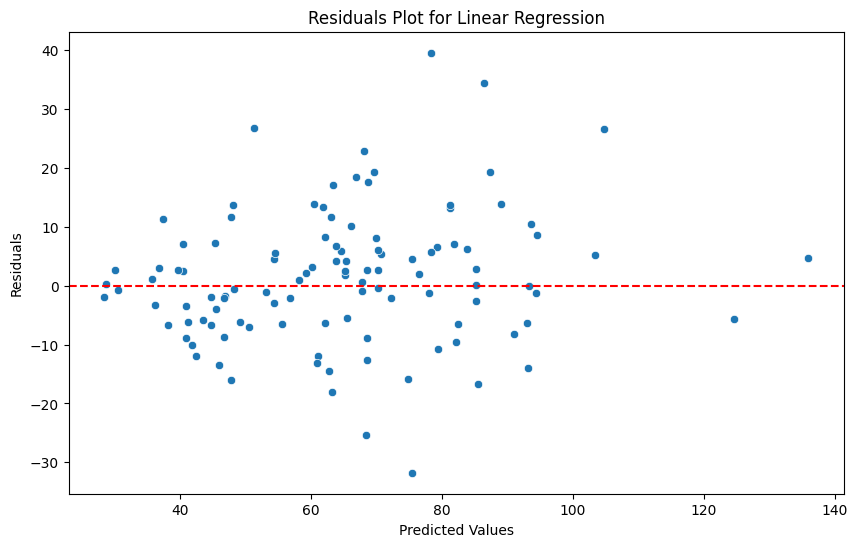

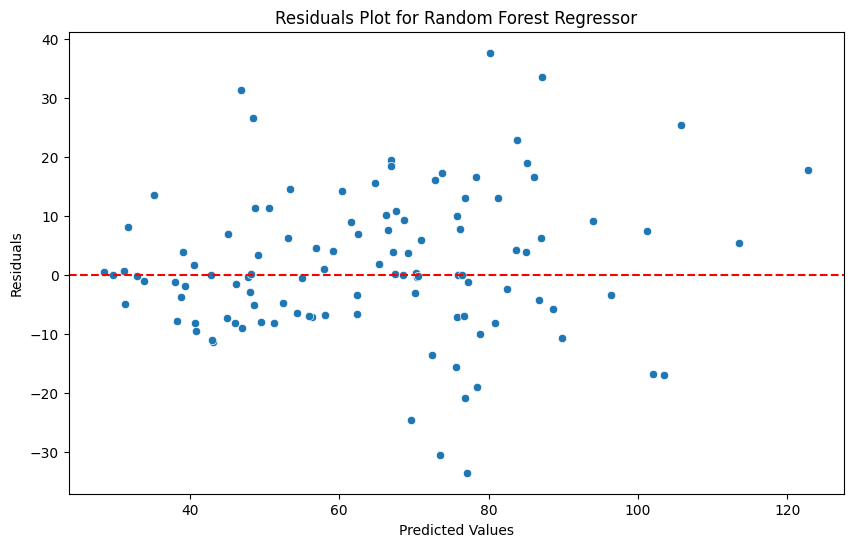

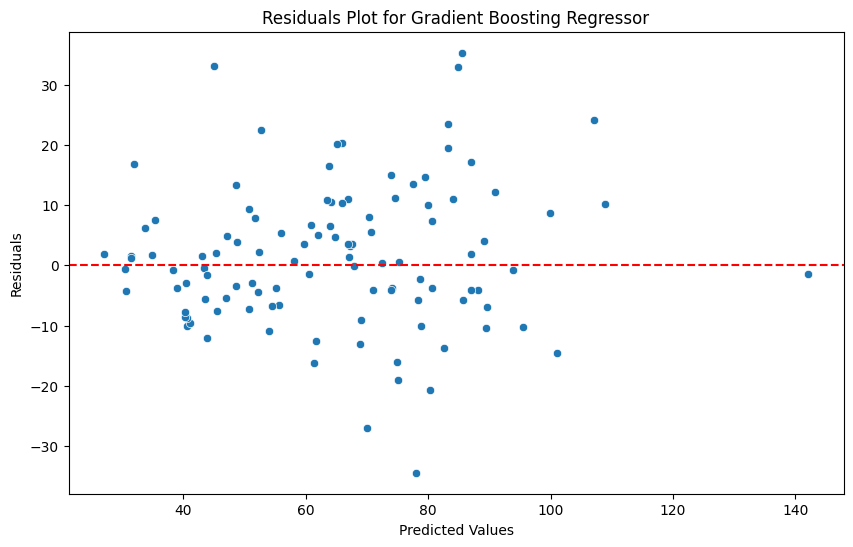

In [303]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model_name}')
    plt.show()

plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest Regressor")
plot_residuals(y_test, y_pred_gbr, "Gradient Boosting Regressor")

# Optimizing Models

In [499]:
def best_linear_fit(x_train, y_train, x_test, y_test) -> tuple[object, dict]:
    '''Tests different parameters for LinearRegression, Ridge and Lasso and returns the best model, its parameters and the score on the training set'''
    best_params = {}
    best_score = 0
    best_model = None
    
    # Define the hyperparameter grid
    degrees = [1, 2, 3]  # Degree of polynomial features
    alphas = [0.1, 1, 10]  # Regularization strengths for Ridge and Lasso
    models = ['linear']
    
    for degree, alpha, model_type in product(degrees, alphas, models):
        if model_type == 'linear':
            model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('linear', LinearRegression())
            ])
            model_name = 'Linear Regression'
        elif model_type == 'ridge':
            model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('ridge', Ridge(alpha=alpha))
            ])
            model_name = 'Ridge Regression'
        elif model_type == 'lasso':
            model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('lasso', Lasso(alpha=alpha))
            ])
            model_name = 'Lasso Regression'
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test, y_pred)
        
        if score > best_score:
            best_model = model
            best_score = score
            best_params = {
                'model': model_name,
                'degree': degree,
                'alpha': alpha if model_type in ['ridge', 'lasso'] else None
            }
    
    return best_model, best_params

# Find the best Linear Regression model
best_model, best_params = best_linear_fit(X_train_scaled, y_train, X_test_scaled, y_test)
print(best_params)

{'model': 'Linear Regression', 'degree': 2, 'alpha': None}


In [500]:
def best_forest_fit(x_train, y_train, x_test,y_test) -> tuple[RandomForestRegressor,dict]:
    '''Tests different parameters for RandomForestRegressor and returns the best model, its parameters and the score on the training set'''
    best_params = {}
    best_score = 0
    best_model = None
    for n_estimators, min_samples_split, min_samples_leaf,max_features in product([5,10,25,50],[5,10,15],[1,3,5],[0.2,'sqrt','log2',1]):
        model = RandomForestRegressor(n_jobs=1,n_estimators=n_estimators,max_depth=None,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,random_state=42)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test,y_pred)
        if score > best_score:
            best_model = model
            best_score = score
            best_params = {'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features}
    return best_model, best_params

rf, forest_params = best_forest_fit(X_train, y_train, X_test, y_test)
print(forest_params)

{'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.2}


In [501]:
def best_gradient_boosting_fit(x_train, y_train, x_test, y_test) -> tuple[GradientBoostingRegressor, dict]:
    '''Tests different parameters for Gradient Boosting Regressor and returns the best model, its parameters'''
    best_params = {}
    best_score = 0
    best_model = None
    for n_estimators, min_samples_split, min_samples_leaf, max_features, learning_rate in tqdm(product([125,150,200,300],[2,5,10],[1,3,5],[0.2,'sqrt','log2',1],[0.05,0.075,0.1,0.15])):
        model = GradientBoostingRegressor(n_estimators=n_estimators,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,learning_rate=learning_rate,random_state=42)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test,y_pred)
        if score > best_score:
            best_model = model
            best_score = score
            best_params = {'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features,'learning_rate':learning_rate}
    return best_model, best_params

gbr, gradient_params = best_gradient_boosting_fit(X_train, y_train, X_test, y_test)
print(gradient_params)

{'n_estimators': 125, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.2, 'learning_rate': 0.075}


In [508]:
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.075, max_features=0.2,
                          min_samples_split=5, n_estimators=125,
                          random_state=42)

In [509]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name) -> dict[str, float]:
    mse: float = mean_squared_error(y_true, y_pred)
    mae: float = mean_absolute_error(y_true, y_pred)
    r2: float  = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}")
    
    return {"mse": mse, "mae": mae, "r2": r2}

lr_scores: dict[str, float] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_scores: dict[str, float] = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
gbr_scores: dict[str, float] = evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")

scores = pd.DataFrame([lr_scores, rf_scores, gbr_scores], index=["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"])

Linear Regression - MSE: 150.64395737784454, MAE: 9.21368393714634, R2: 0.7476602618134613
Random Forest Regressor - MSE: 167.55948490271598, MAE: 9.796516371382259, R2: 0.719325505735545
Gradient Boosting Regressor - MSE: 149.67586302271994, MAE: 9.319948000479897, R2: 0.7492818912525984


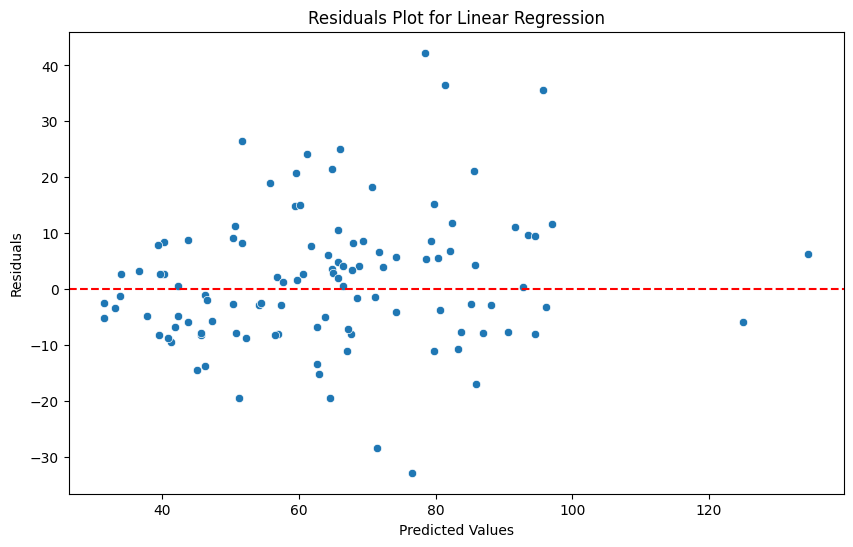

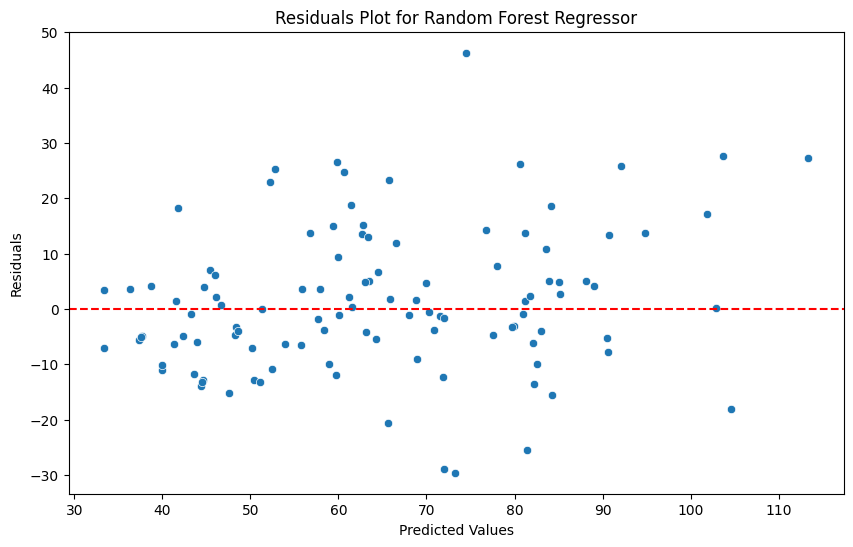

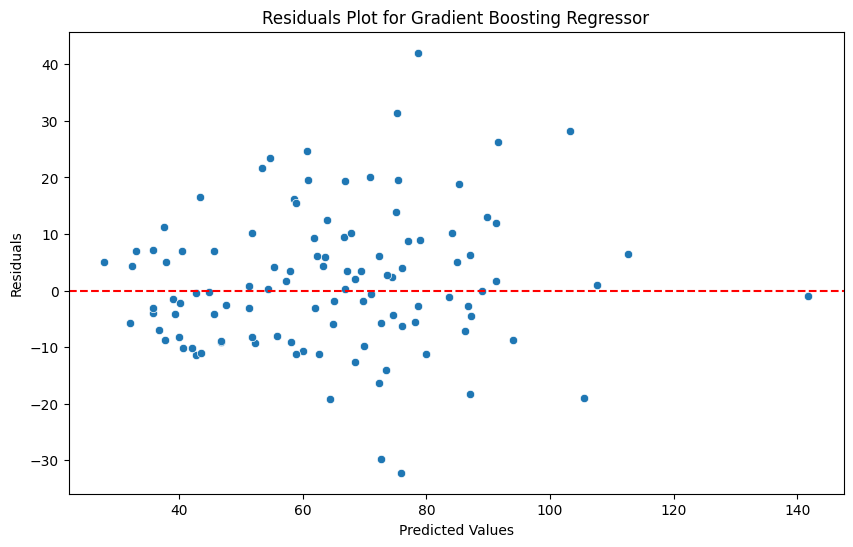

In [510]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model_name}')
    plt.show()

plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest Regressor")
plot_residuals(y_test, y_pred_gbr, "Gradient Boosting Regressor")

It is clear, that the models' accuracy decreases, when the predicted values are higher. This suggests heteroscedasticity, and can be improved with transforming data.

# Lowering heteroscedasticity

Transformed Random Forest Regressor - MSE: 216.32448759649958, MAE: 11.190232835780018, R2: 0.6376405299382685


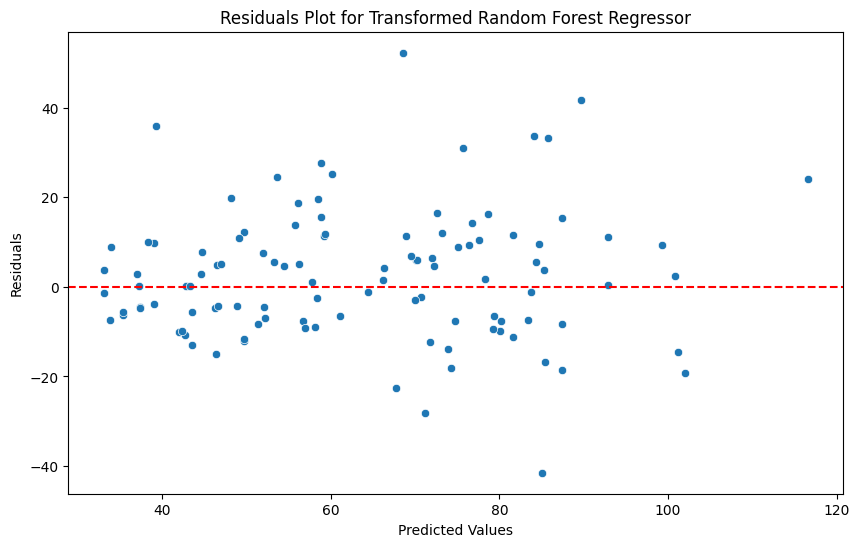

Transformed Gradient Boosting Regressor - MSE: 169.97607904736537, MAE: 9.624859102043349, R2: 0.7152775323260678


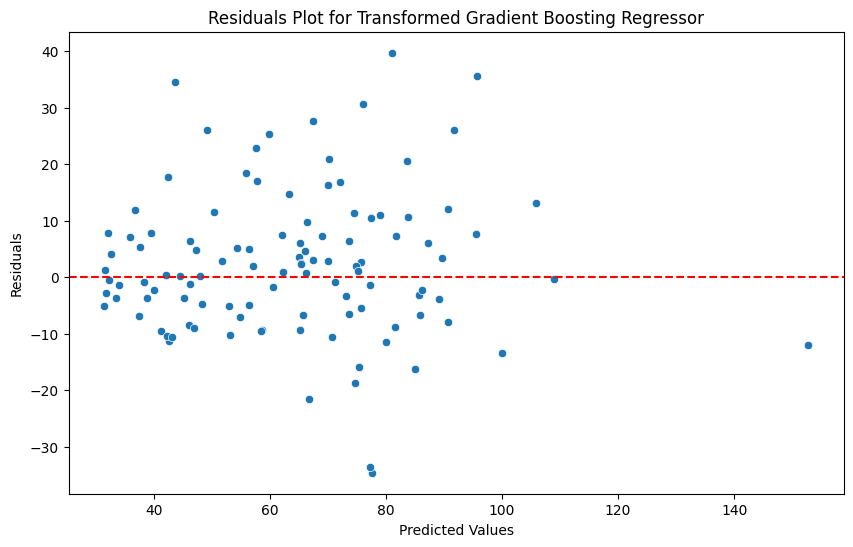

In [505]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

gbr.fit(X_train, y_train_log)
y_pred_log_gbr = gbr.predict(X_test)
y_pred_gbr = np.expm1(y_pred_log_gbr)

rf.fit(X_train, y_train_log)
y_pred_log_rf = rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)

evaluate_model(y_test, y_pred_rf, "Transformed Random Forest Regressor")
plot_residuals(y_test, y_pred_rf, "Transformed Random Forest Regressor")

evaluate_model(y_test, y_pred_gbr, "Transformed Gradient Boosting Regressor")
plot_residuals(y_test, y_pred_gbr, "Transformed Gradient Boosting Regressor")

Applying a logarithmic transformation to data slightly improved the MSE and MAE values for Gradient Boosting Regressor. R2 score slightly dropped